# Intro to keras
    - Load MNIST dataset
    - Linear model
    - Convolutional model

In [1]:
from __future__ import print_function

#Basic libraries
import numpy as np
import keras
print('Keras version: ', keras.__version__)

#Show images
import matplotlib.pyplot as plt
%matplotlib inline
# plt configuration
plt.rcParams['figure.figsize'] = (10, 10)        # size of images
plt.rcParams['image.interpolation'] = 'nearest'  # show exact image
plt.rcParams['image.cmap'] = 'gray'  # use grayscale 


Using TensorFlow backend.


Keras version:  1.1.1


## Get some data

In [2]:
# Import mnist dataset and rescale between [0,1]
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

print('X train shape: ',X_train.shape)
print('y train shape: ',y_train.shape)
print('X test shape: ', X_test.shape)
print('y test shape: ', y_test.shape)

X train shape:  (60000, 28, 28)
y train shape:  (60000,)
X test shape:  (10000, 28, 28)
y test shape:  (10000,)


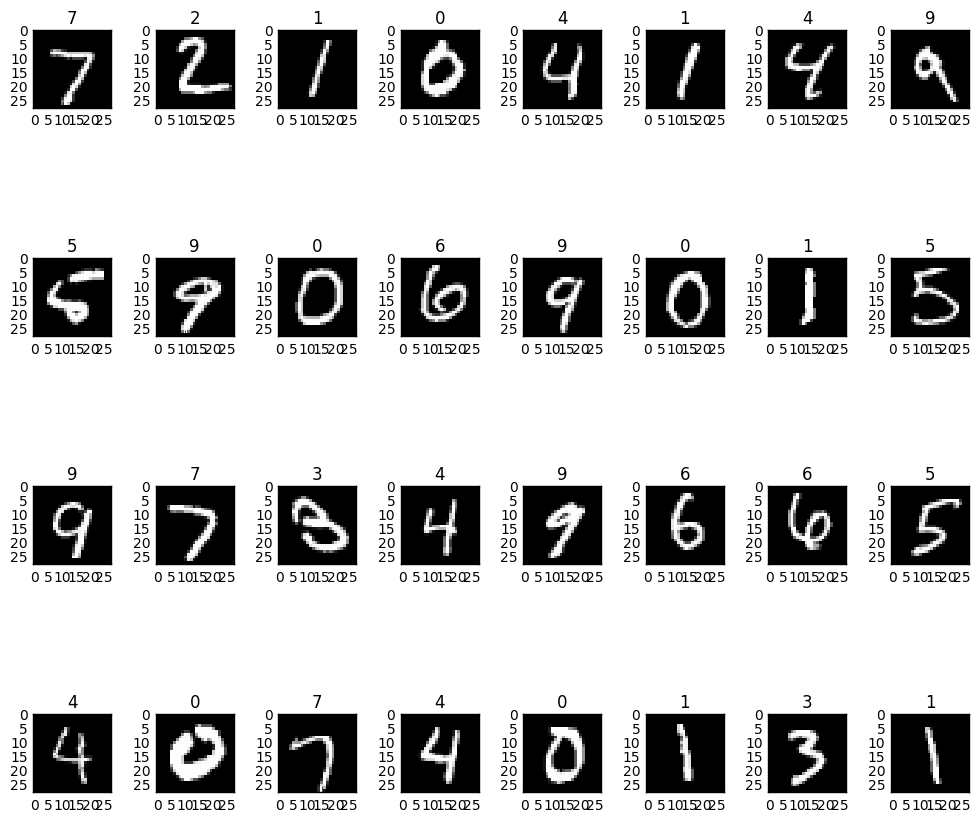

In [3]:
#Examine the data
fig = plt.figure()
for n, i in enumerate(range(32)): 
    a = fig.add_subplot(4,8,n+1)
    a.set_title(str(y_test[i]))
    fig.tight_layout()
    plt.imshow(X_test[i])
    

## Linear model

In [4]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense

print('Linear model...')
images = Input(batch_shape=(None, 28, 28), dtype='float32', name='Images') 
flat = Flatten(name='Flat_image')(images)
output = Dense(10, activation='softmax', name='Dense_output')(flat)

# Model Architecture defined
model_linear = Model(input=images, output=output)
model_linear.summary()


Linear model...
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Images (InputLayer)              (None, 28, 28)        0                                            
____________________________________________________________________________________________________
Flat_image (Flatten)             (None, 784)           0           Images[0][0]                     
____________________________________________________________________________________________________
Dense_output (Dense)             (None, 10)            7850        Flat_image[0][0]                 
Total params: 7850
____________________________________________________________________________________________________


In [5]:
# Compile model and select optimizer
from keras.optimizers import sgd

sgd_optimizer = sgd(lr=0.01)
model_linear.compile(loss='sparse_categorical_crossentropy', 
                     optimizer=sgd_optimizer, metrics=['accuracy'])

In [6]:
# Train the model
batch_size = 128
nb_epoch = 50

history_linear = model_linear.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch,
                                  verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s - loss: 1.3262 - acc: 0.6803 - val_loss: 0.8218 - val_acc: 0.8346
Epoch 2/50
60000/60000 [==============================] - 0s - loss: 0.7191 - acc: 0.8433 - val_loss: 0.6089 - val_acc: 0.8620
Epoch 3/50
60000/60000 [==============================] - 0s - loss: 0.5865 - acc: 0.8617 - val_loss: 0.5255 - val_acc: 0.8736
Epoch 4/50
60000/60000 [==============================] - 0s - loss: 0.5240 - acc: 0.8704 - val_loss: 0.4795 - val_acc: 0.8818
Epoch 5/50
60000/60000 [==============================] - 0s - loss: 0.4861 - acc: 0.8759 - val_loss: 0.4496 - val_acc: 0.8877
Epoch 6/50
60000/60000 [==============================] - 0s - loss: 0.4602 - acc: 0.8806 - val_loss: 0.4285 - val_acc: 0.8919
Epoch 7/50
60000/60000 [==============================] - 0s - loss: 0.4412 - acc: 0.8837 - val_loss: 0.4122 - val_acc: 0.8942
Epoch 8/50
60000/60000 [==============================] - 0s 

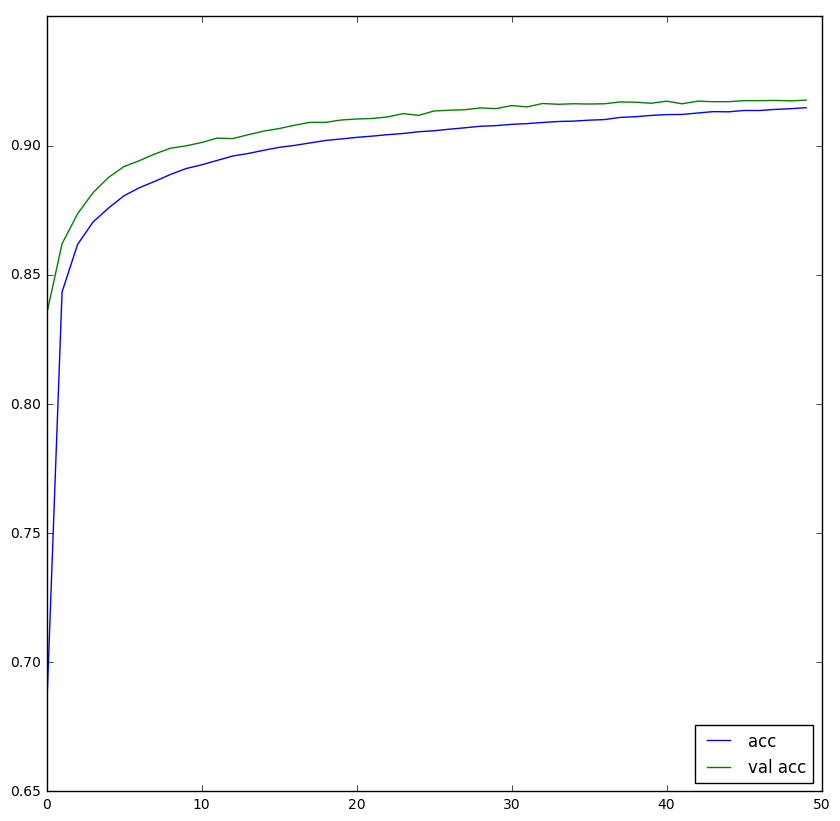

In [7]:
plt.plot(history_linear.history['acc'], label='acc')
plt.plot(history_linear.history['val_acc'], label='val acc')
plt.legend(loc='lower right')
plt.show()

## Neural network model 

In [8]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense

print('NN model...')
images = Input(batch_shape=(None, 28, 28), dtype='float32', name='Images') 
flat = Flatten(name='Flat_image')(images)

dense = Dense(500, activation='relu', name='Dense_layer')(flat)

output = Dense(10, activation='softmax', name='Dense_output')(dense)

# Model Architecture defined
model_nn = Model(input=images, output=output)
model_nn.summary()


NN model...
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Images (InputLayer)              (None, 28, 28)        0                                            
____________________________________________________________________________________________________
Flat_image (Flatten)             (None, 784)           0           Images[0][0]                     
____________________________________________________________________________________________________
Dense_layer (Dense)              (None, 500)           392500      Flat_image[0][0]                 
____________________________________________________________________________________________________
Dense_output (Dense)             (None, 10)            5010        Dense_layer[0][0]                
Total params: 397510
__________________________________________________________

In [9]:
sgd_optimizer = sgd(lr=0.01)
model_nn.compile(loss='sparse_categorical_crossentropy', 
                 optimizer=sgd_optimizer, metrics=['accuracy'])


In [10]:
# Train the model
batch_size = 128
nb_epoch = 50

history_nn = model_nn.fit(X_train, y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s - loss: 1.1119 - acc: 0.7538 - val_loss: 0.6032 - val_acc: 0.8655
Epoch 2/50
60000/60000 [==============================] - 3s - loss: 0.5244 - acc: 0.8730 - val_loss: 0.4336 - val_acc: 0.8917
Epoch 3/50
60000/60000 [==============================] - 3s - loss: 0.4209 - acc: 0.8908 - val_loss: 0.3732 - val_acc: 0.9025
Epoch 4/50
60000/60000 [==============================] - 3s - loss: 0.3741 - acc: 0.8996 - val_loss: 0.3399 - val_acc: 0.9104
Epoch 5/50
60000/60000 [==============================] - 3s - loss: 0.3454 - acc: 0.9053 - val_loss: 0.3182 - val_acc: 0.9145
Epoch 6/50
60000/60000 [==============================] - 3s - loss: 0.3250 - acc: 0.9107 - val_loss: 0.3027 - val_acc: 0.9186
Epoch 7/50
60000/60000 [==============================] - 3s - loss: 0.3091 - acc: 0.9149 - val_loss: 0.2896 - val_acc: 0.9212
Epoch 8/50
60000/60000 [==============================] - 3s 

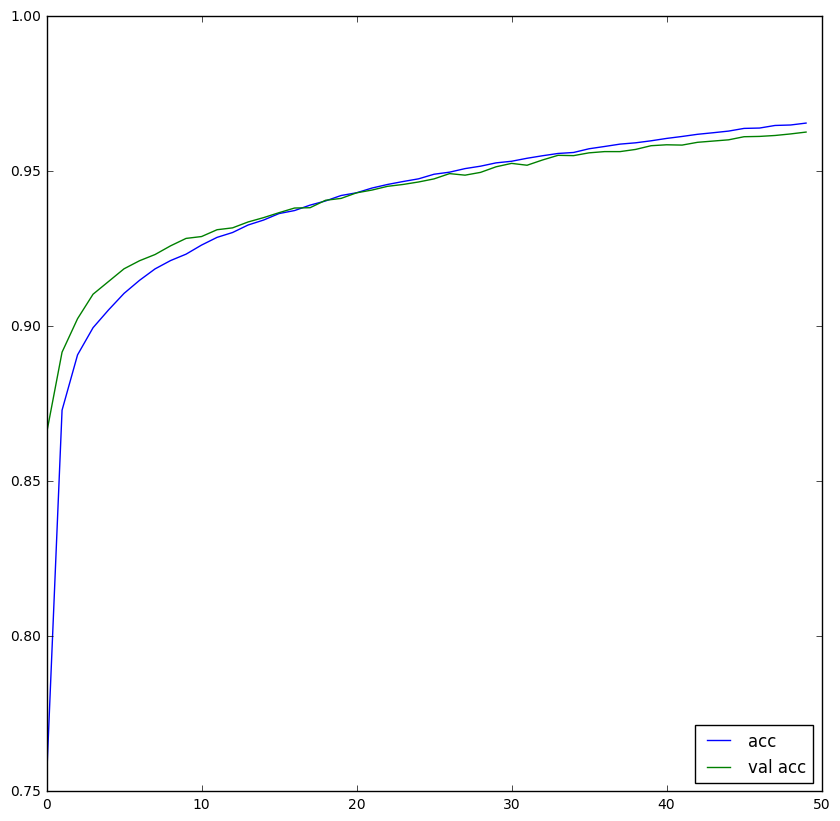

In [11]:
plt.plot(history_nn.history['acc'], label='acc')
plt.plot(history_nn.history['val_acc'], label='val acc')
plt.legend(loc='lower right')
plt.show()

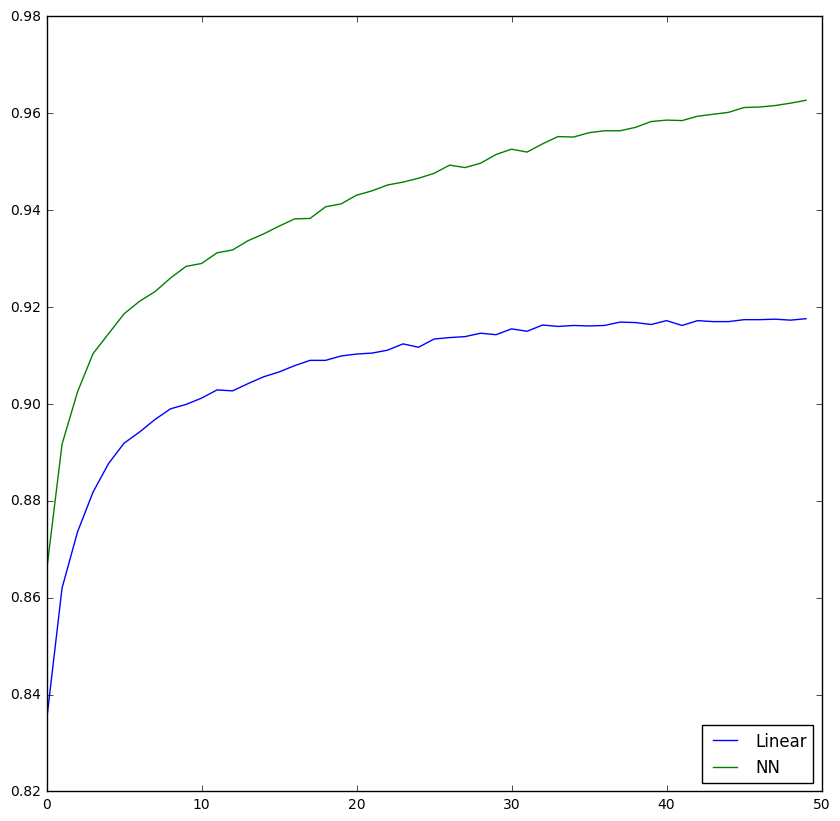

In [12]:
# Compare the two models
plt.plot(history_linear.history['val_acc'], label='Linear')
plt.plot(history_nn.history['val_acc'], label='NN')
plt.legend(loc='lower right')
plt.show()

## Convolutional model

In [16]:
#Define the model

from keras.models import Model
from keras.layers import Input, Flatten, Dense, Convolution2D, Reshape, MaxPooling2D, Dropout
from keras.optimizers import sgd

print('Convolutional model...')
print('LeNet architecture.')

#Inputs
images = Input(batch_shape=(None, 28, 28, 1), dtype='float32', name='Images') #"image_dim_ordering": "tf"
#images = Input(batch_shape=(None, 1, 28, 28), dtype='float32', name='Images') #"image_dim_ordering": "th"

#First convolutional layer
conv1 = Convolution2D(20, 5, 5)(images)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

#Second convolutional layer
conv2 = Convolution2D(50, 5, 5)(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

#Flatten convolution output
flat = Flatten(name='Flat image')(pool2)

# First dense layer
dense1 = Dense(500, activation='relu', name='Dense_1')(flat)

# Second dense layer
output = Dense(10, activation='softmax', name='Dense_output')(dense1)

# Model Architecture defined
model_conv = Model(input=images, output=output)
model_conv.summary()


Convolutional model...
LeNet architecture.
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Images (InputLayer)              (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 24, 24, 20)    520         Images[0][0]                     
____________________________________________________________________________________________________
maxpooling2d_3 (MaxPooling2D)    (None, 12, 12, 20)    0           convolution2d_3[0][0]            
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 8, 8, 50)      25050       maxpooling2d_3[0][0]             
________________________________________________

In [17]:
# Compile model and select optimizer
sgd_optimizer = sgd(lr=0.01, momentum=0.99, decay=0.005, nesterov=True)
model_conv.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])


In [18]:
# Train the model
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) #"image_dim_ordering": "tf"
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
#X_train = X_train.reshape(X_train.shape[0], 1, 28, 28) # "image_dim_ordering": "th"
#X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

batch_size = 256
nb_epoch = 10
history = model_conv.fit(X_train, y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 30s - loss: 0.4234 - acc: 0.8923 - val_loss: 0.1064 - val_acc: 0.9669
Epoch 2/10
60000/60000 [==============================] - 31s - loss: 0.0738 - acc: 0.9783 - val_loss: 0.0580 - val_acc: 0.9825
Epoch 3/10
60000/60000 [==============================] - 36s - loss: 0.0368 - acc: 0.9889 - val_loss: 0.0442 - val_acc: 0.9872
Epoch 4/10
60000/60000 [==============================] - 30s - loss: 0.0219 - acc: 0.9936 - val_loss: 0.0375 - val_acc: 0.9894
Epoch 5/10
60000/60000 [==============================] - 30s - loss: 0.0161 - acc: 0.9953 - val_loss: 0.0364 - val_acc: 0.9899
Epoch 6/10
60000/60000 [==============================] - 31s - loss: 0.0118 - acc: 0.9965 - val_loss: 0.0370 - val_acc: 0.9897
Epoch 7/10
60000/60000 [==============================] - 32s - loss: 0.0092 - acc: 0.9976 - val_loss: 0.0385 - val_acc: 0.9898
Epoch 8/10
60000/60000 [==============================

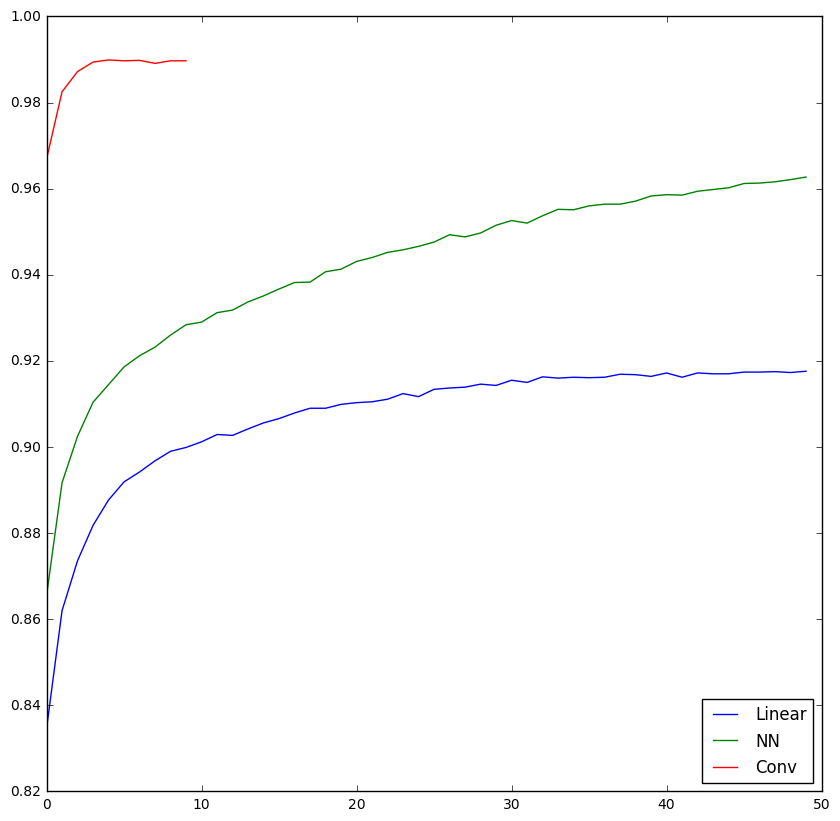

In [19]:
#Compare with previous
# Compare the two models
plt.plot(history_linear.history['val_acc'], label='Linear')
plt.plot(history_nn.history['val_acc'], label='NN')
plt.plot(history.history['val_acc'], label='Conv')
plt.legend(loc='lower right')
plt.show()


In [20]:
# Score and select prediction with max prob
import numpy as np
pred_test = np.argmax(model_conv.predict(X_test), axis=1)

#Evaluate the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_test))

[[ 972    0    0    0    0    0    3    2    3    0]
 [   0 1131    0    1    0    0    2    1    0    0]
 [   0    1 1023    2    1    0    0    3    2    0]
 [   0    0    1 1000    0    3    0    3    1    2]
 [   0    0    1    0  973    0    1    1    1    5]
 [   2    0    1    6    0  880    1    1    1    0]
 [   5    2    0    0    2    4  945    0    0    0]
 [   0    2    5    1    0    0    0 1015    1    4]
 [   1    0    2    2    0    2    0    2  964    1]
 [   2    0    1    2    4    3    0    2    1  994]]


Num errors:  103


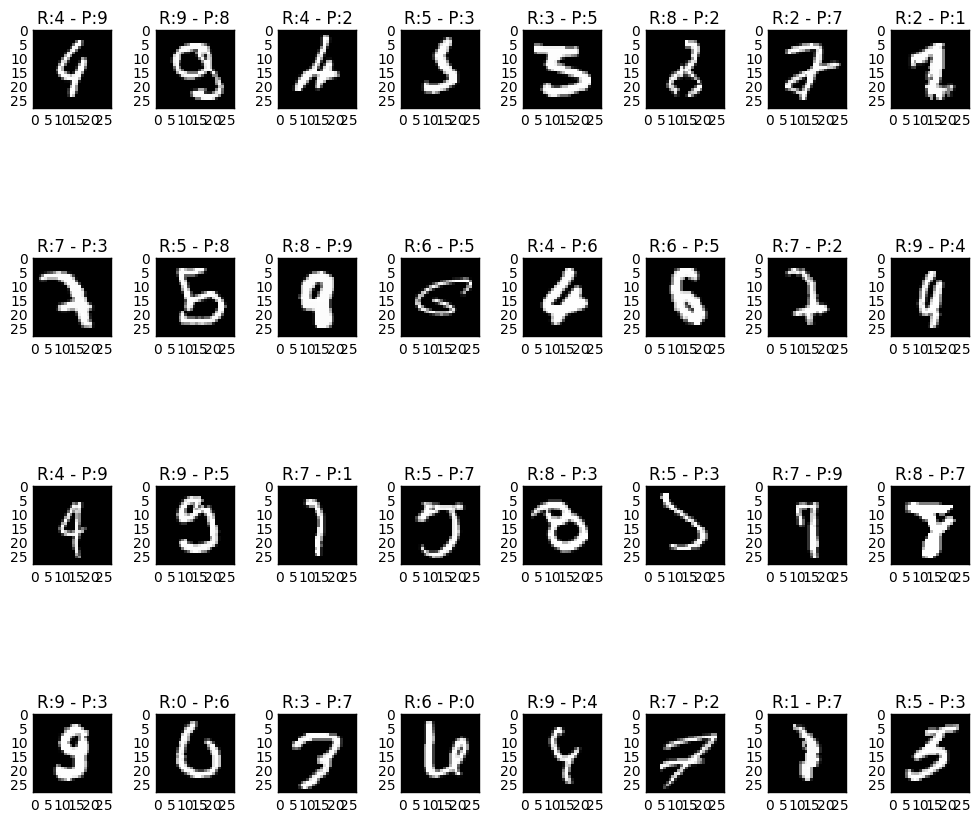

In [21]:


#Cumulate errors
test_errors=[]
test_errors_real=[]
test_errors_predict=[]
for i in range(len(pred_test)):
    if pred_test[i] != y_test[i]: #Error!
        test_errors += [X_test[i,:,:,0]]
        test_errors_real += [y_test[i]]
        test_errors_predict += [pred_test[i]]  
print("Num errors: ", len(test_errors))


#Plot 32 images wrong classified.
fig = plt.figure()
for n, i in enumerate(range(32)): 
    a = fig.add_subplot(4,8,n+1)
    a.set_title('R:'+str(test_errors_real[i])+' - P:'+str(test_errors_predict[i]))
    fig.tight_layout()
    plt.imshow(test_errors[i])
    